<a href="https://colab.research.google.com/github/Pro-Mentor/ml-model/blob/main/extract_skills_from_job_descriptions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracting Skills from Job Descriptions

This project consists of finding a correlation between job descriptions and skills.

We will focus on the following jobs:

*   Software Engineer
*   QA Engineer
*   UI/UX Engineer
*   Project Manager
*   Data Engineer
*   DevOps Engineer
*   ML Engineer

## 1. Problem Definition

> How well can we predict the desired IT job role based on given skills?



In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O

# to preprocess text data
import string
# import nltk
# from nltk.corpus import stopwords
# nltk.download('stopwords')
# nltk.download('wordnet')

import nltk
from nltk.corpus import stopwords

import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')

from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from wordcloud import WordCloud

import matplotlib.pyplot as plt
%matplotlib inline
from textblob import Word

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## 2. Data

The data is extracted from couple of datasets available in Kaggle platform.

1. [US Software Engineer Jobs](https://www.kaggle.com/datasets/mexwell/us-software-engineer-jobs)
2. [US based Technology Jobs](https://www.kaggle.com/code/rayjohnsoncomedy/job-skills/input?select=dice_com-job_us_sample.csv)
3. [Data Engineer Jobs](https://www.kaggle.com/code/samruddhim/analysis-of-data-engineer-jobs/input)
4. [Online Job Postings](https://www.kaggle.com/code/tusharsarkar/it-job-recommendation/input?select=data+job+posts.csv)

In [ ]:
# read csv files of finalized job descriptions
software_engineers = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-job-descriptions/software-engineer.csv')
qa_engineers = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-job-descriptions/qa-engineer.csv')
uiux_engineers = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-job-descriptions/uiux-engineer.csv')
project_managers = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-job-descriptions/project-manager.csv')
data_engineers = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-job-descriptions/data-engineer.csv')
devops_engineers = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-job-descriptions/devops-engineer.csv')
ml_engineers = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-job-descriptions/ml-engineer.csv')

# get the number of rows in each job
se_rows = software_engineers.shape[0]
qa_rows = qa_engineers.shape[0]
ui_rows = uiux_engineers.shape[0]
pm_rows = project_managers.shape[0]
de_rows = data_engineers.shape[0]
do_rows = devops_engineers.shape[0]
ml_rows = ml_engineers.shape[0]

# print the number of rows
print("Number of total job descriptions")
print(f"Software Engineer : {se_rows}")
print(f"QA Engineer : {qa_rows}")
print(f"UI/UX Engineer : {ui_rows}")
print(f"Project Manager : {pm_rows}")
print(f"Data Engineer : {de_rows}")
print(f"DevOps Engineer : {do_rows}")
print(f"ML Engineer : {ml_rows}")

Number of total job descriptions
Software Engineer : 1047
QA Engineer : 445
UI/UX Engineer : 406
Project Manager : 408
Data Engineer : 645
DevOps Engineer : 1055
ML Engineer : 347




*   The least number of job descriptions are available for ML engineer job role.
*    So, we can create a seperate dataset randomly combining job descriptions of all the above job roles of **around 350 data rows from each**.


In [ ]:
# getting random sample datasets of 350 rows from each other than ML engineers
software_engineers = software_engineers.sample(n=350, random_state=42)
qa_engineers = qa_engineers.sample(n=350, random_state=42)
uiux_engineers = uiux_engineers.sample(n=350, random_state=42)
project_managers = project_managers.sample(n=350, random_state=42)
data_engineers = data_engineers.sample(n=350, random_state=42)
devops_engineers = devops_engineers.sample(n=350, random_state=42)

# get the number of rows in each job
se_rows = software_engineers.shape[0]
qa_rows = qa_engineers.shape[0]
ui_rows = uiux_engineers.shape[0]
pm_rows = project_managers.shape[0]
de_rows = data_engineers.shape[0]
do_rows = devops_engineers.shape[0]
ml_rows = ml_engineers.shape[0]

# print the number of rows
print("Number of rows in Random Sample Datasets")
print(f"Software Engineer : {se_rows}")
print(f"QA Engineer : {qa_rows}")
print(f"UI/UX Engineer : {ui_rows}")
print(f"Project Manager : {pm_rows}")
print(f"Data Engineer : {de_rows}")
print(f"DevOps Engineer : {do_rows}")
print(f"ML Engineer : {ml_rows}")

Number of rows in Random Sample Datasets
Software Engineer : 350
QA Engineer : 350
UI/UX Engineer : 350
Project Manager : 350
Data Engineer : 350
DevOps Engineer : 350
ML Engineer : 347


In [ ]:
# concatenate the random sample datasets into a single dataset
df = pd.concat([
    software_engineers,
    qa_engineers,
    uiux_engineers,
    project_managers,
    data_engineers,
    devops_engineers,
    ml_engineers
], ignore_index=True)

df.to_csv('/content/drive/MyDrive/FYP/datasets/final-job-descriptions/random-sample-dataset.csv', index=False)

## 3. Evaluation

## 4. Features

Getting an overall idea about the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2447 entries, 0 to 2446
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        2447 non-null   object
 1   description  2447 non-null   object
dtypes: object(2)
memory usage: 38.4+ KB


In [ ]:
df.head()

,title,description
0,Software Engineer,- Develop Web Applications in accordance with ...
1,Software Engineer,Develop quality software and web applications....
2,Software Engineer,Job Title: Entry Level Software Engineer.\n Tr...
3,Software Engineer,Use programming languages and software to buil...
4,Software Engineer,Create programme database for the office and\r...


In [ ]:
# shuffle the dataset
df = df.sample(frac=1, random_state=42)
df.head()

,title,description
2222,Machine Learning Engineer,Experience applying various machine learning t...
1228,Project Manager,"BPA Technologies, Inc., was founded in 2004 by..."
1159,Project Manager,"Senior IT Project Manager, Charlestown, MA Kel..."
1957,DevOps Engineer,Automating at-will setup/teardown of environme...
879,UI/UX Engineer,Helping patients start and stay on treatment w...


In [ ]:
df.isna().sum()

title          0
description    0
dtype: int64

In [ ]:
df.head(20).T

,2222,1228,1159,1957,879,1786,1477,668,1050,2081,237,1598,422,2087,1666,2016,2273,1113,416,507
title,Machine Learning Engineer,Project Manager,Project Manager,DevOps Engineer,UI/UX Engineer,DevOps Engineer,Data Engineer,QA Engineer,Project Manager,DevOps Engineer,Software Engineer,Data Engineer,QA Engineer,DevOps Engineer,Data Engineer,DevOps Engineer,Machine Learning Engineer,Project Manager,QA Engineer,QA Engineer
description,Experience applying various machine learning t...,"BPA Technologies, Inc., was founded in 2004 by...","Senior IT Project Manager, Charlestown, MA Kel...",Automating at-will setup/teardown of environme...,Helping patients start and stay on treatment w...,You have a proven track record of implementing...,Job Description\nData Engineer\n\nBigtime Ente...,The following job is a long-term contract with...,Business Development Sr Manager/Director/AVP –...,This role is responsible to bring their experi...,The ideal candidate will have a skill for toug...,Bachelor's degree or higher in Computer Scienc...,The candidate needs to have strong C++ and Jav...,Provide escalation support to technical suppor...,"Locations: TX - Plano, United States of Americ...","In addition to working on the DevOps team, you...",Contributed to open source ML software.\n Deli...,"Position: IT Project Manager Location: Miami, ...",These Testers shall be capable of performing t...,Develop and execute test automation through Cu...


In [ ]:
# Check the values of different columns

# Set the display option to show all rows
pd.set_option('display.max_rows', None)

df.title.value_counts()

Project Manager              350
DevOps Engineer              350
UI/UX Engineer               350
Data Engineer                350
QA Engineer                  350
Software Engineer            350
Machine Learning Engineer    347
Name: title, dtype: int64

## 5. Preprocessing text data

Since the data we're now working with is at its rawest form, we need to preprocess it before extracting information from it.

in this step, we will:

1.  Convert all text to lower cases
2.  Delete all tabulation,spaces, and new lines
3.  Delete all numericals
4.  Delete nltk's defined stop words
5.  Lemmatize text

In [ ]:
# Make a copy of the original DataFrame to perform edits on
df_tmp = df.copy()

In [ ]:
## Lower case
df_tmp['description'] = df_tmp['description'].apply(lambda x: " ".join(x.lower()for x in x.split()))

## remove tabulation and punctuation
df_tmp['description'] = df_tmp['description'].str.replace('[^\w\s]',' ')

## digits
df_tmp['description'] = df_tmp['description'].str.replace('\d+', '')

#remove stop words
stop = stopwords.words('english')
df_tmp['description'] = df_tmp['description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

## lemmatization
df_tmp['description'] = df_tmp['description'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

print("Preprocessed data: \n")
print(df_tmp.head())

<ipython-input-56-d63d4a8d5d11>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_tmp['description'] = df_tmp['description'].str.replace('[^\w\s]',' ')
<ipython-input-56-d63d4a8d5d11>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df_tmp['description'] = df_tmp['description'].str.replace('\d+', '')


Preprocessed data: 

                          title  \
2222  Machine Learning Engineer   
1228            Project Manager   
1159            Project Manager   
1957            DevOps Engineer   
879              UI/UX Engineer   

                                            description  
2222  experience applying various machine learning t...  
1228  bpa technology inc founded group highly motiva...  
1159  senior project manager charlestown kelly servi...  
1957  automating setup teardown environment develope...  
879   helping patient start stay treatment rule driv...  


### **Visualize data**

In this step, we will **aggregate our data by job titles** in order to visualy detect the most frequent words for each job.

In [ ]:
## jda stands for job description aggregated
jda = df_tmp.groupby(['title']).sum().reset_index()
print("Aggregated job descriptions: \n")
print(jda)

Aggregated job descriptions: 

                       title  \
0              Data Engineer   
1            DevOps Engineer   
2  Machine Learning Engineer   
3            Project Manager   
4                QA Engineer   
5          Software Engineer   
6             UI/UX Engineer   

                                         description  
0  job description data engineer bigtime entertai...  
1  automating setup teardown environment develope...  
2  experience applying various machine learning t...  
3  bpa technology inc founded group highly motiva...  
4  following job long term contract leader invest...  
5  ideal candidate skill tough puzzle talent comm...  
6  helping patient start stay treatment rule driv...  



*** Data Engineer ***



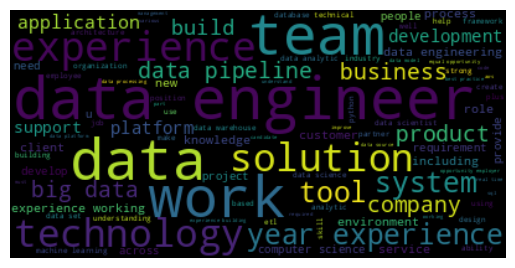


*** DevOps Engineer ***



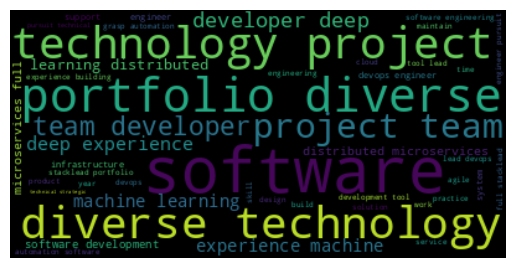


*** Machine Learning Engineer ***



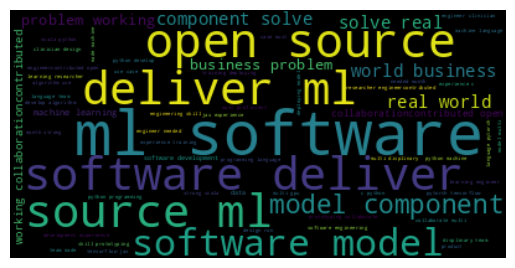


*** Project Manager ***



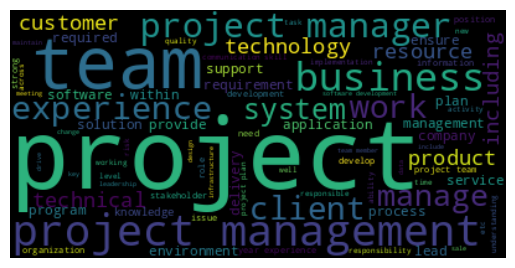


*** QA Engineer ***



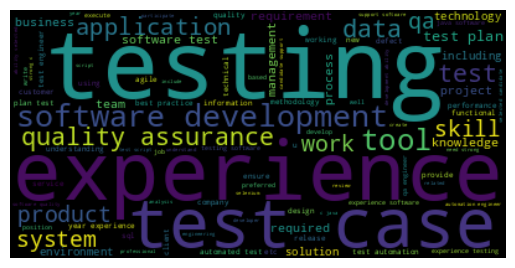


*** Software Engineer ***



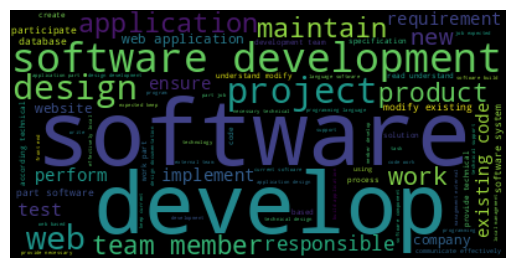


*** UI/UX Engineer ***



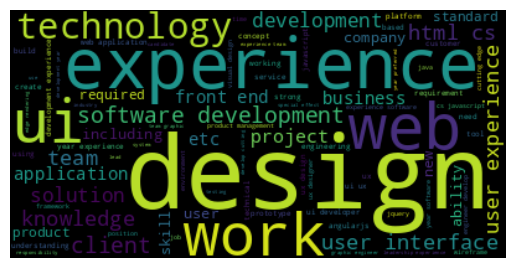

In [ ]:
## Visualize data
jobs_list = jda.title.unique().tolist()
for job in jobs_list:

    # Start with one review:
    text = jda[jda.title == job].iloc[0].description
    # Create and generate a word cloud image:
    wordcloud = WordCloud().generate(text)
    print("\n***",job,"***\n")
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()


*   The presence of meaningless words were noticed, such as: Technology, Software, Experience, etc. As well as the presence of the job title itself.
*   We can safely delete these words from our data.

In [ ]:
# delete more stop words

other_stop_words = [
    'experience', 'technology', 'data', 'engineer', 'customer', 'developer', 'company', 'work', 'client'
]
df_tmp['description'] = df_tmp['description'].apply(lambda x: " ".join(x for x in x.split() if x not in other_stop_words))

## 6. Modelling

We are now going to translate this skill-extraction problem into a classification one first. And then extract the most important features from each class.

The most important features, in this case, represent the words that most likely will belong to a class ( in our case job title)

***The Naive Bayes Algorithm is chosen to train.***

In [ ]:
## Converting text to features
vectorizer = TfidfVectorizer()

#Tokenize and build vocabulary
X = vectorizer.fit_transform(df_tmp.description)
y = df_tmp.title

# split data into 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=109)
print("train data shape: ",X_train.shape)
print("test data shape: ",X_test.shape)

# Fit model
clf = MultinomialNB()
clf.fit(X_train, y_train)
## Predict
y_predicted = clf.predict(X_test)

train data shape:  (1957, 12109)
test data shape:  (490, 12109)


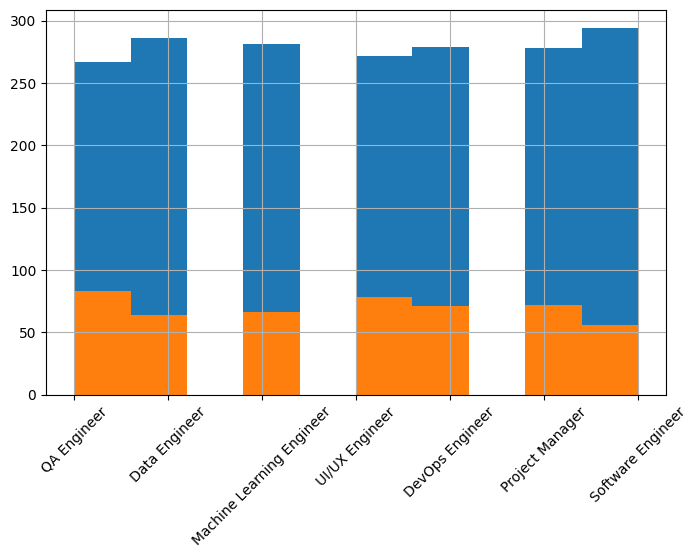

In [ ]:
plt.figure(figsize=(8, 5))

y_train.hist()
y_test.hist()

plt.xticks(rotation=45)
plt.show()

## 7. Model Evaluation


In [ ]:
#evaluate the predictions
print("Accuracy score is: ",accuracy_score(y_test, y_predicted))
print("Classes: (to help read Confusion Matrix)\n", clf.classes_)
print("Confusion Matrix: ")

print(confusion_matrix(y_test, y_predicted))
print("Classification Report: ")
print(classification_report(y_test, y_predicted))

Accuracy score is:  0.8571428571428571
Classes: (to help read Confusion Matrix)
 ['Data Engineer' 'DevOps Engineer' 'Machine Learning Engineer'
 'Project Manager' 'QA Engineer' 'Software Engineer' 'UI/UX Engineer']
Confusion Matrix: 
[[64  0  0  0  0  0  0]
 [21 45  0  5  0  0  0]
 [ 9  0 52  2  2  1  0]
 [ 3  0  0 69  0  0  0]
 [ 4  1  0  2 75  1  0]
 [ 5  0  0  2  3 46  0]
 [ 4  0  0  2  0  3 69]]
Classification Report: 
                           precision    recall  f1-score   support

            Data Engineer       0.58      1.00      0.74        64
          DevOps Engineer       0.98      0.63      0.77        71
Machine Learning Engineer       1.00      0.79      0.88        66
          Project Manager       0.84      0.96      0.90        72
              QA Engineer       0.94      0.90      0.92        83
        Software Engineer       0.90      0.82      0.86        56
           UI/UX Engineer       1.00      0.88      0.94        78

                 accuracy          

In [ ]:
import joblib

# Save the vectorizer to a file
joblib.dump(vectorizer, '/content/drive/MyDrive/FYP/models/vectorizer-1.pkl')

# Save the classifier to a file
joblib.dump(clf, '/content/drive/MyDrive/FYP/models/classifier-1.pkl')

['/content/drive/MyDrive/FYP/models/classifier-1.pkl']

**Our accuracy score is 86% which is acceptable.**

In [ ]:
# Preprocessing function
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()

    # Remove tabulation and punctuation
    text = re.sub('[^\w\s]', ' ', text)

    # Remove digits
    text = re.sub('\d+', '', text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_text = [word for word in words if word not in stop_words]
    text = ' '.join(filtered_text)

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = word_tokenize(text)
    lemmatized_text = [lemmatizer.lemmatize(word) for word in words]
    text = ' '.join(lemmatized_text)

    return text

# Function for predicting job title
def predict_job_title(job_description, vectorizer, classifier):
    # Preprocess the job description
    preprocessed_description = preprocess_text(job_description)

    # Vectorize the preprocessed job description
    description_vector = vectorizer.transform([preprocessed_description])

    # Predict the job title
    predicted_title = classifier.predict(description_vector)

    return predicted_title[0]


des1 = """
Responsibilities:

- Develop and execute test plans, test cases, and test scripts for software applications.
- Conduct manual and automated testing to identify defects and ensure software functionality.
- Collaborate with development and product teams to understand project requirements.
- Perform regression testing to validate software changes and enhancements.
- Document test results, defects, and issues, and track them to resolution.
- Participate in the continuous improvement of QA processes and methodologies.
- Stay up-to-date with industry best practices and testing tools.

Requirements:

- Bachelor's degree in Computer Science or a related field.
- Proven experience as a QA Engineer or in a similar quality assurance role.
- Strong knowledge of testing methodologies, tools, and techniques.
- Experience with test automation tools (e.g., Selenium, Appium) is a plus.
- Attention to detail and excellent problem-solving skills.
- Effective communication and collaboration skills.
"""

# Load the vectorizer
vectorizer = joblib.load('/content/drive/MyDrive/FYP/models/vectorizer-1.pkl')

# Load the classifier
clf = joblib.load('/content/drive/MyDrive/FYP/models/classifier-1.pkl')

print(f"{predict_job_title(des1, vectorizer, clf)}")

QA Engineer
